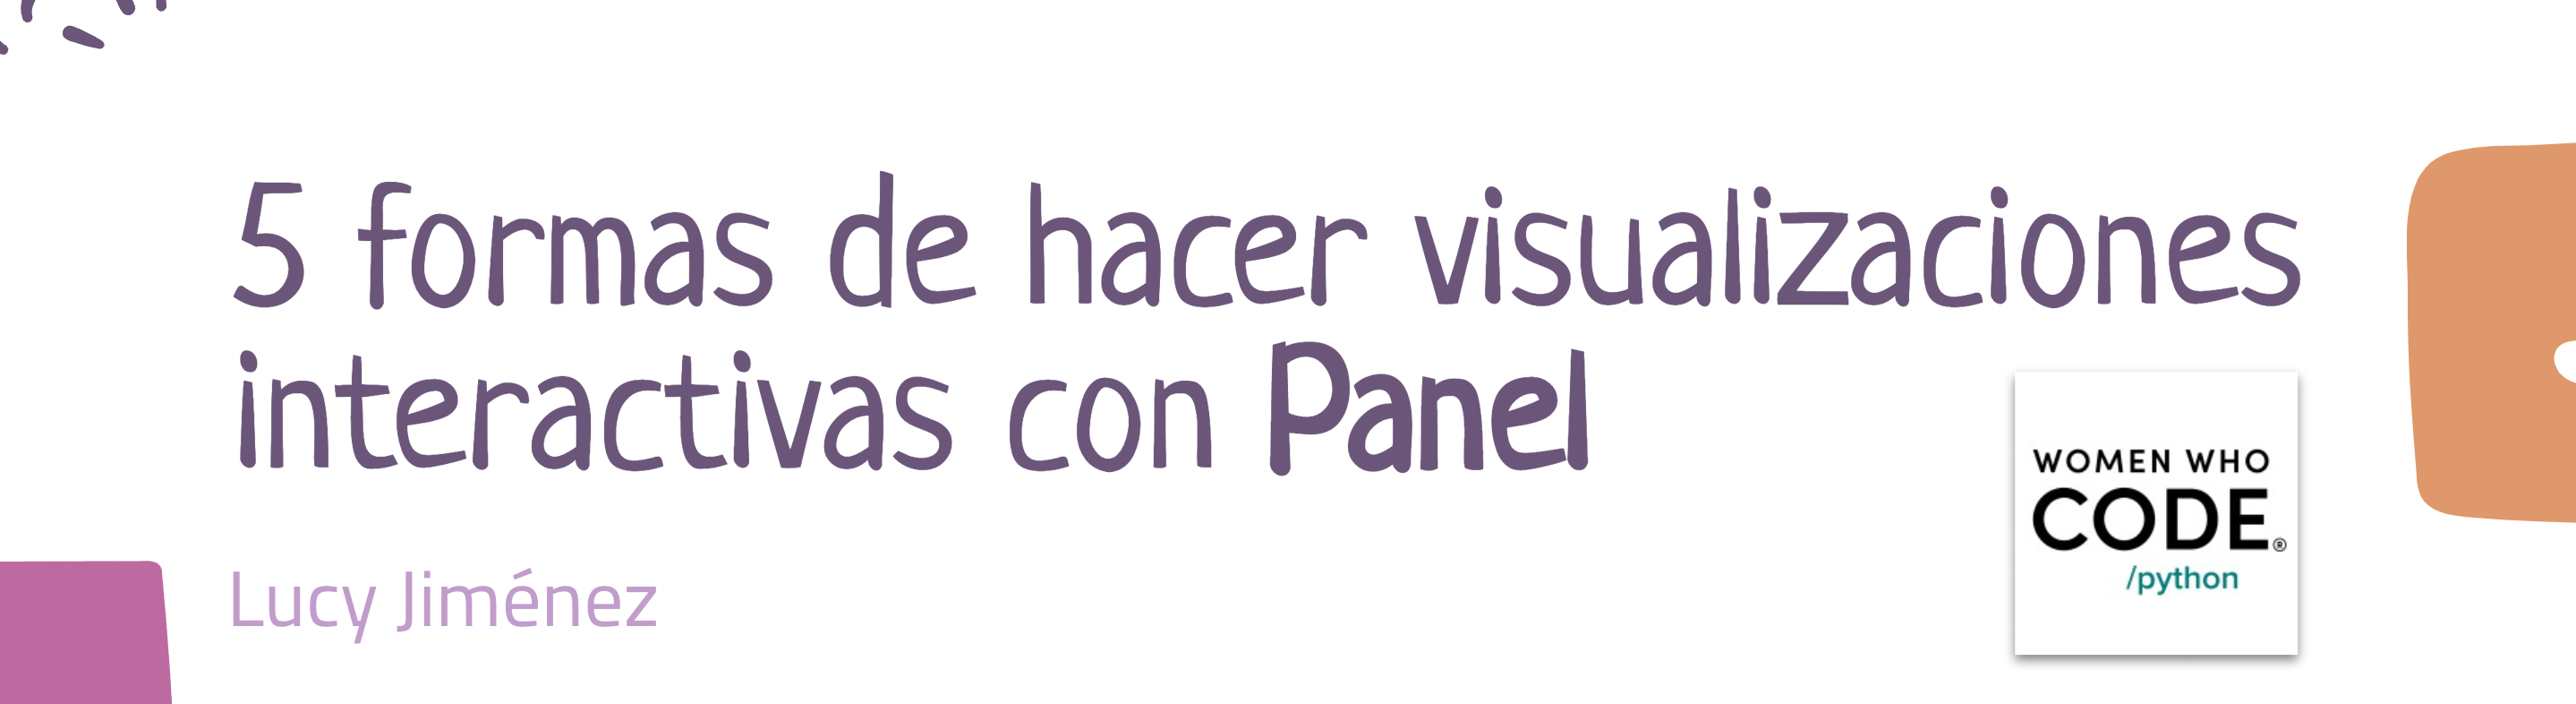

[Twitter](https://twitter.com/JimenezLucyJ), [Linkedin](https://www.linkedin.com/in/lucy-j/)

# **Preparación del Setup**

In [1]:
import numpy as np 
import pandas as pd
import panel as pn

import plotly.express as px
import holoviews as hv
import hvplot.pandas

from holoviews.operation.timeseries import rolling

hv.extension('bokeh')
pn.extension()
pn.extension('tabulator', css_files=[pn.io.resources.CSS_URLS['font-awesome']])

import warnings
warnings.filterwarnings('ignore')

# **Los Datos**

### **[Gapmider](https://www.gapminder.org/data/)**

* country: país
* year: año
* pop: población total
* continent: continente
* lifeExp: La esperanza de vida o expectativa de vida es la media de la cantidad de años que vive una determinada población absoluta o total en un cierto período.
* GDP per Capita: El PIB per cápita mide la producción económica de una nación por persona. Busca determinar la prosperidad de una nación mediante el crecimiento económico por persona en esa nación. Esta métrica busca evaluar el ingreso promedio por persona para una región determinada con el fin de determinar el nivel de vida y la calidad de vida de una población.

In [2]:
# Cargar datos
url = 'https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv'
dataset = pd.read_csv(url)

In [3]:
# Ver el dataset
dataset.head(5)

country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3  Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4  Afghanistan  1972  13079460.0      Asia   36.088  739.981106

In [4]:
dataset['size'] = np.sqrt(dataset['pop']*2.666051223553066e-05)

In [5]:
dataset.head(5)

country  year         pop continent  lifeExp   gdpPercap       size
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314  14.987451
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030  15.696115
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710  16.544658
3  Afghanistan  1967  11537966.0      Asia   34.020  836.197138  17.538759
4  Afghanistan  1972  13079460.0      Asia   36.088  739.981106  18.673647

# **Visualización 1**

## **BoxPlot**

In [6]:
dataset.continent.unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [7]:
colors = {
    'Asia': '#1f77b4',
    'Europe': '#ff7f0e',
    'Africa': '#2ca02c',
    'Americas': '#324d67',
    'Oceania': '#da28ca'
}

In [8]:
box = dataset.hvplot.box('lifeExp', by=["continent"], c='continent',
                    cmap=colors, width=800, height=500, legend=False,
                    yformatter='%.0f').opts(xlabel='Continent', ylabel='Life expectancy (years)')
box

:BoxWhisker   [continent]   (lifeExp)

# **Visualización 2**

## **Scatter plot**

In [9]:
plot  = dataset.hvplot.scatter('gdpPercap', 'lifeExp', by='continent', s='size', logx=True, width=800, height=500, hover_cols=['country'])
plot  = plot.options(legend_position='bottom_right', xticks=[500, 1000, 2000, 5000, 10000])
plot  = plot.redim.label(gdpPercap='GDP per capita', lifeExp='Life expectancy (years)')
plot  = plot.redim.range(lifeExp=(20, 90), gdpPercap=(200, 13000))
plot

:NdOverlay   [continent]
   :Scatter   [gdpPercap]   (lifeExp,size,country)

# **Visualización 3**

In [11]:
dataset.head(2)

country  year        pop continent  lifeExp   gdpPercap       size
0  Afghanistan  1952  8425333.0      Asia   28.801  779.445314  14.987451
1  Afghanistan  1957  9240934.0      Asia   30.332  820.853030  15.696115

In [12]:
# Make DataFrame Pipeline Interactive
idf = dataset.interactive()

#### **Widgets**

In [13]:
dataset.year.min(), dataset.year.max()

(1952, 2007)

In [28]:
# Define Panel widgets
year_slider = pn.widgets.IntSlider(name='Year slider', start=1952, end=2007, step=1, value=1970)

In [29]:
year_slider

IntSlider(end=2007, name='Year slider', start=1952, value=1970)

In [15]:
# Radio buttons for lifeExp measures
yaxis_lifeExp = pn.widgets.RadioButtonGroup(name='Y axis',
                                            options=['lifeExp', 'gdpPercap',], 
                                            button_type='success')

In [16]:
yaxis_lifeExp

RadioButtonGroup(button_type='success', name='Y axis', options=['lifeExp', 'gdpPercap'], value='lifeExp')

#### **Ruta de los datos**

In [17]:
continents = dataset.continent.unique().tolist()

lifeExp_pipeline = (
    idf[(idf.year <= year_slider) & (idf.continent.isin(continents))]
    .groupby(['continent', 'year'])[yaxis_lifeExp].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)

In [18]:
lifeExp_pipeline

### **Gráfico de líneas interactivo**

In [19]:
lifeExp_plot = lifeExp_pipeline.hvplot('year',
                                       yaxis_lifeExp,
                                       by='continent',
                                       line_width=2,
                                       title='Life expectancy by continent')
lifeExp_plot

# **Visualización 4**

### **Tabla interactiva**

In [20]:
lifeExp_table = lifeExp_pipeline.pipe(pn.widgets.Tabulator, 
                                      pagination='remote', 
                                      page_size = 10, 
                                      sizing_mode='stretch_width') 
lifeExp_table

# **Visualización 5**

[Gapminder](https://nbviewer.org/github/holoviz-demos/gapminder/blob/master/gapminder.ipynb)

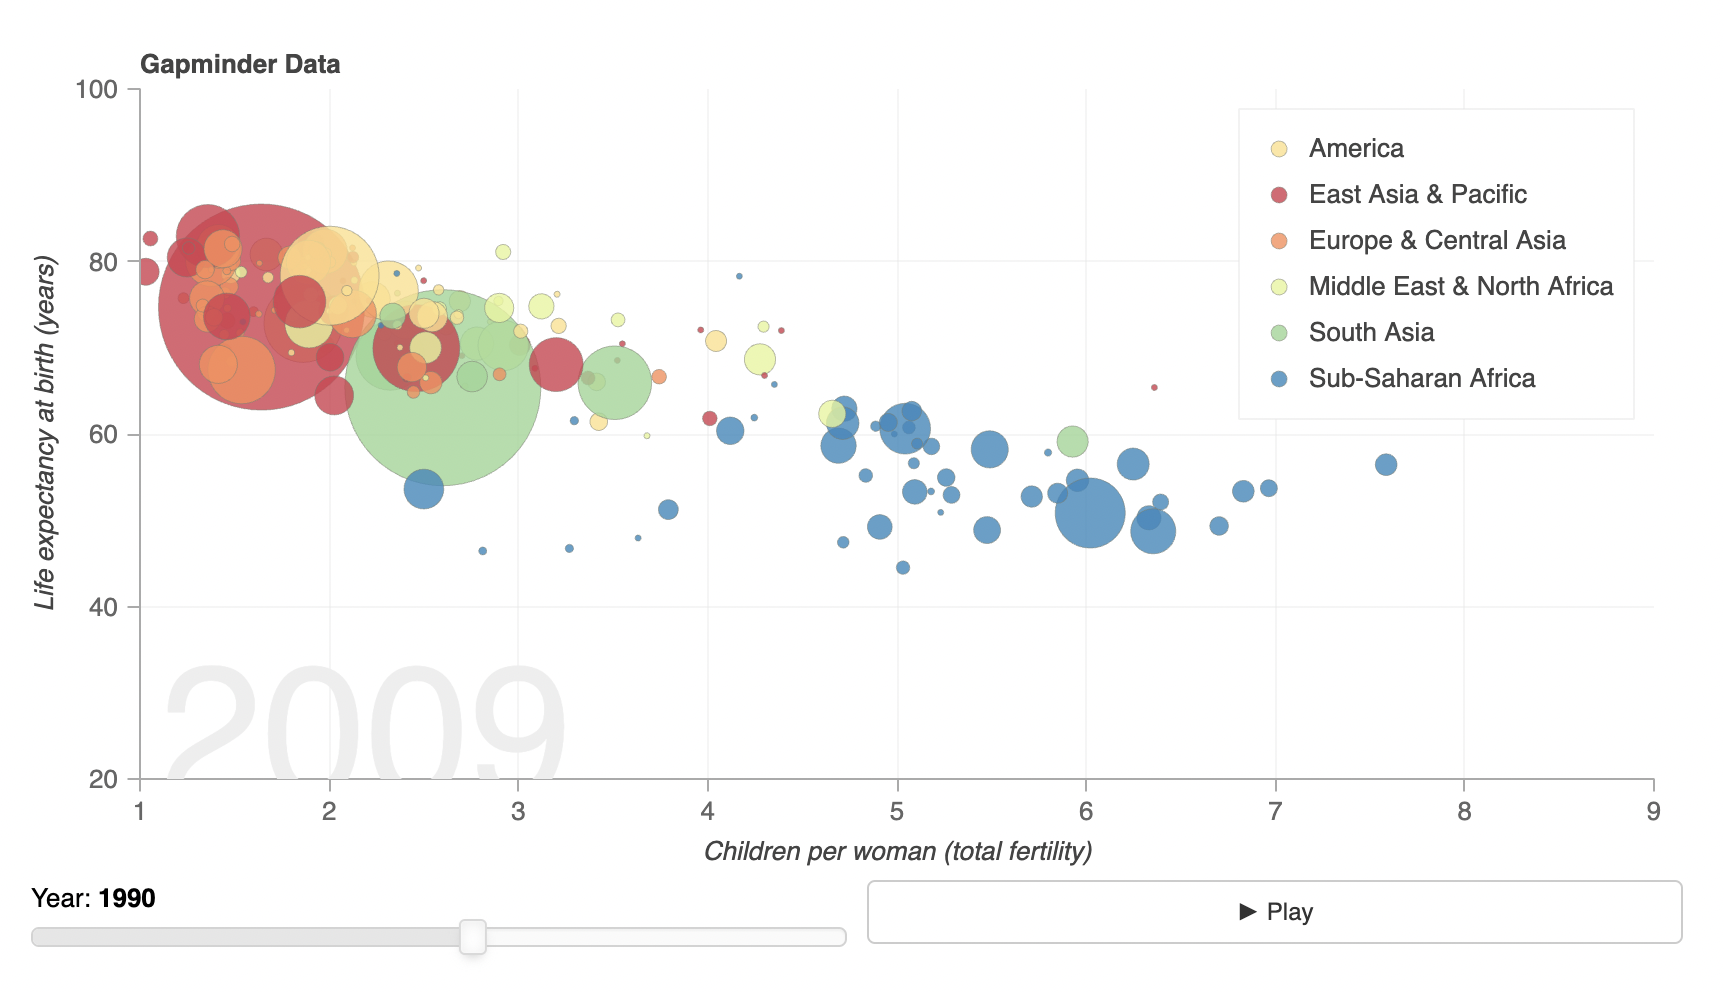

# **Otros recursos**

- [Documentación de Panel](https://panel.holoviz.org/index.html)
- [Galeria de Plotly](https://plotly.com/python/plotly-express/#gallery)
- [Gapminder embebido en una página web](https://demo.bokeh.org/gapminder)